# Altair python library

Altair is a declarative statistical visualization library for Python. With Altair, you can spend more time understanding your data and its meaning. 


In this notebook we will use some interactive visualizations to map the data

Upvote if you find this useful :)

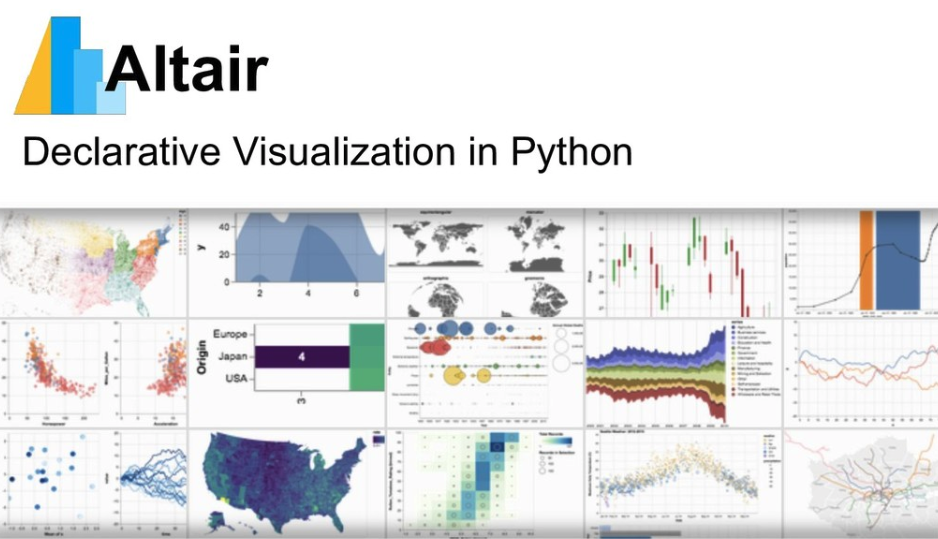

# Before visualizing the dataset. Let us see some basic visualization using Altair lib

In [ ]:
#importing altair library 

import altair as alt


#other libraries

import numpy as np
import pandas as pd 

import os

import random
import warnings
warnings.simplefilter('ignore')

In [ ]:
a = [i for i in range(1,16)]
b = np.random.randint(100,size=(1,15))
b = b.flatten()



sample1 = pd.DataFrame(list(zip(a,b)) , columns =['x','y'])
sample1

In [ ]:
#bar chart visualization


alt.Chart(sample1).mark_bar().encode(x ='x', y='y')


In [ ]:
#simple line chart

alt.Chart(sample1).mark_line().encode(x ='x', y='y')

For the next chart try zooming in and out and toggle over the graph

In [ ]:
#making the line chart interactive


alt.Chart(sample1).mark_line().encode(x ='x', y='y', tooltip=['x','y']).interactive()

In [ ]:
#scatter plot


alt.Chart(sample1).mark_circle(size = 60).encode(x ='x', y='y')

In [ ]:
#scatter plot with a hue

alt.Chart(sample1).mark_circle(size = 60).encode(x ='x', y='y' , color='y')

In [ ]:
#let us add some more attributes to sample1

rand_list = ['yes','no','maybe']
li =[]

for i in range(len(sample1)):
    
    random_choice = random.choice(rand_list)
    li.append(random_choice)

sample1['value'] = li
sample1

In [ ]:
#area chart


alt.Chart(sample1).mark_area().encode(x='x',y ='y',color='value')


In [ ]:
#bar chart with highlighting condition

bars =alt.Chart(sample1).mark_bar().encode(x ='x', y='y', color = alt.condition(alt.datum.value =='yes',alt.value('red'),alt.value('steelblue')))
bars

In [ ]:
#let us try to label the chart


txt = bars.mark_text(align ='left', baseline ='middle', dx =3).encode(text='value')

(bars + txt).properties(width=600)

In [ ]:

for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


In [ ]:
df = pd.read_csv('/kaggle/input/hr-analytics-job-shift/HR analytics.csv')
df

# Now let us prepare the data with pandas library. This will help us to visualize in a better way

In [ ]:
df.info()

In [ ]:
df.isnull().sum()

In [ ]:
df.gender.fillna(method ='ffill',inplace = True)
df.education_level.fillna(method ='bfill', inplace = True)

In [ ]:
df.isnull().sum()

In [ ]:
df.rename(columns ={'Job changes' : 'job_changes', 'Has HR expereince': 'hr_exp', 'University Grade':'univ_grade'},inplace = True)
df

In [ ]:
df.experience.unique()

In [ ]:
df.experience.replace({'<1':1,'>20':20},inplace = True)
df.experience.unique()

In [ ]:
df.experience.fillna(0,inplace = True)

In [ ]:
df.experience.unique()

# Subset the dataset for our convenience

In [ ]:
sub_df = df[['city','gender','univ_grade','education_level','hr_exp','experience']]
sub_df

In [ ]:
sub_df.isnull().sum()

In [ ]:
sub_df.describe()

In [ ]:
sub_df.experience.value_counts()

In [ ]:
sub_df.experience = sub_df.experience.astype(int)

In [ ]:
sub_df.info()

# Bar chart visualizaion

In [ ]:
bars = alt.Chart(sub_df).mark_bar().encode(
    x='mean(experience)',
    y="city"
)



bars

In [ ]:
alt.Chart(sub_df).mark_bar().encode(x ='hr_exp', y='count(hr_exp)', column='univ_grade', color='hr_exp')

# Histogram

In [ ]:
alt.Chart(sub_df).mark_bar().encode(alt.X('experience', bin = True),y='count()')

# Interactive visualization

In [ ]:
alt.Chart(sub_df).mark_circle(size=60).encode(
    x='education_level',
    y='experience',
    color='gender',
    tooltip=['city','gender']
).interactive().properties(width=500)

# Charts with slider

In [ ]:
pink_blue = alt.Scale(domain=('Male', 'Female', 'Other'),
                      range=["steelblue", "salmon", 'red'])

slider = alt.binding_range(min=0, max=20, step=2)
select_exp = alt.selection_single(name="experience", fields=['experience'],
                                   bind=slider, init={'experience': 20})

alt.Chart(sub_df).mark_bar().encode(
    x='gender',
    y='count(experience)',
    color=alt.Color('gender', scale=pink_blue),
    column='education_level'
).properties(
    width=150
).add_selection(
    select_exp
).transform_filter(
    select_exp
).configure_facet(
    spacing=8
)